### Dimensionality Reduction

In [1]:
# There are two ways to achieve this:
# -Feature selection & feature extraction

#### Principal Component analysis -(Feaure extraction)
“Principal component analysis is an unsupervised feature extraction algorithm that takes in m-dimensional input to create a set of 
n(m >> n) linearly uncorrelated variables”


In [3]:
import pandas as pd

# Load the Iris dataset into pandas Dataframe
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Display the head of the dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
# import standard scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# separate the features and the class
X = iris.drop('class', axis=1)
y = iris['class']

# scale the features of X
x = pd.DataFrame(StandardScaler().fit_transform(X), columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

x.head()
                                                               
                                                               

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [27]:
# we are now in a good place to apply the PCA algorithm.

#import PCA
from sklearn.decomposition import PCA

#Initialize a PCA object to transform into the 2D spaces
pca = PCA(n_components=2)

#Apply PCA
pca_iris = pca.fit_transform(x)
pca_iris = pd.DataFrame(data=pca_iris, columns=['PC1', 'PC2'])

pca_iris.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [28]:
pca.explained_variance_ratio_

#first principal component hold about 72.8% of information & second principal components hold 23.3% 
# in total 95.8% of information is retained whereas 4.2% of information is lost in removing 2 dimentional

array([0.72770452, 0.23030523])

In [29]:
# concatenate the class variable
pca_iris = pd.concat([pca_iris, y], axis=1)

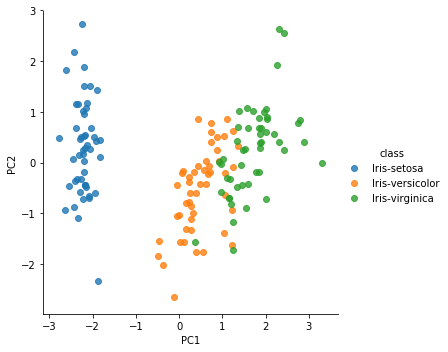

In [30]:
# Finally lets visualize our data points by class in the new 2D plane:
import seaborn as sns

#Display the scatterplot
sns.lmplot(x='PC1', y='PC2', data=pca_iris, hue='class', fit_reg=False)

#### 2. Linear-Discriminant analysis

In [31]:
# LDA aims to identify a set of n features that result in the maximum separation(discrimation) of classes.
# since LDA requires labeled data in order to determine its components it is supervised learning algorithms

In [ ]:
# apply LDA algorithms to the iris dataset

#import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define LDA to have 2 components
lda = LinearDiscriminantAnalysis(n_components=2)

# Apply LDA
lda_iris = lda.fit_transform(X, y)
lda_iris = pd.DataFrame(data= lda_iris, columns=['C1', 'C2'])

# concatenate the class variable
lda_iris = pd.concat([lda_iris, y], )